#**Roadmap for "Customer Review Analysis for E-Commerce" Data Analysis Project**


#Step 1: Project Setup


Objective: Set up the environment and import necessary libraries.


Actions:
Create a new Google Colaboratory notebook.
Install and import necessary Python libraries: pandas, numpy, matplotlib, seaborn, nltk, wordcloud, etc.


#Step 2: Data Collection and Preprocessing
Objective: Collect and clean the dataset.

Actions:
Load the dataset containing columns "Name", "Surname", "Product name", "Rating", and "Comment".
Handle missing values (if any).
Perform basic exploratory data analysis (EDA) to understand the dataset.


#Step 3: Exploratory Data Analysis (EDA)
Objective: Understand the distribution and key characteristics of the data.

Actions:
Analyze the distribution of ratings.
Generate summary statistics for ratings.
Visualize the distribution of ratings using bar plots.
Analyze the most frequent words in comments using word clouds.


#Step 4: Sentiment Analysis
Objective: Determine the sentiment of the reviews.

Actions:
Use Natural Language Processing (NLP) techniques to preprocess the comments.
Tokenize, lemmatize, and remove stop words from the comments.
Use sentiment analysis tools (e.g., VADER from nltk or TextBlob) to classify the sentiment of each comment.


#Step 5: Feature Engineering
Objective: Create additional features for deeper analysis.

Actions:
Extract useful features from comments (e.g., comment length, number of positive/negative words).
Combine these features with existing data for more comprehensive analysis.


#Step 6: Visualization
Objective: Visualize insights gained from the data.

Actions:
Plot sentiment distribution.
Plot average ratings per product.
Create word clouds for positive and negative comments separately.


#Step 7: Advanced Analysis
Objective: Conduct advanced analysis to find deeper insights.

Actions:
Analyze correlation between comment length and rating.
Perform product-wise and user-wise analysis of ratings and comments.
Use clustering techniques to identify patterns in customer reviews.


#Step 8: Reporting
Objective: Summarize and present findings.
Actions:
Compile key insights and visualizations into a final report.
Present actionable insights and recommendations.

In [1]:
# Step 1: Project Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# Step 2: Data Collection and Preprocessing
# Load dataset (assume it's a CSV file uploaded to Colab)
df = pd.read_csv('customer_reviews.csv')

In [3]:
# Handle missing values
df.dropna(inplace=True)

In [4]:
# Step 3: Exploratory Data Analysis (EDA)
# Summary statistics
print(df['Rating'].describe())

count    250.000000
mean       3.052000
std        1.388889
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64


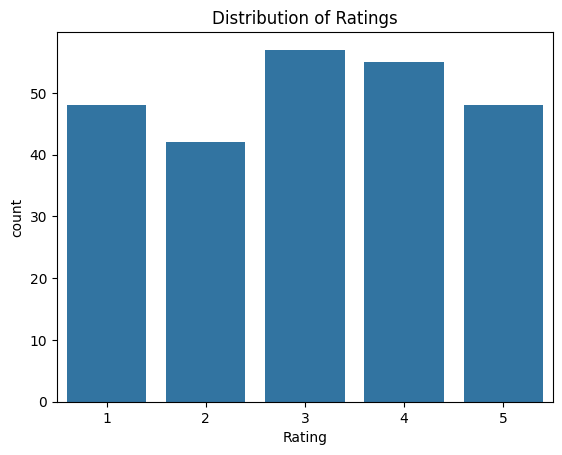

In [5]:
# Distribution of ratings
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

In [6]:
# Step 4: Sentiment Analysis
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [7]:
# Function to get sentiment score
def get_sentiment(comment):
    return sid.polarity_scores(comment)['compound']

df['Sentiment'] = df['Comment'].apply(get_sentiment)

In [8]:
# Step 5: Feature Engineering
# Comment length
df['Comment_Length'] = df['Comment'].apply(len)

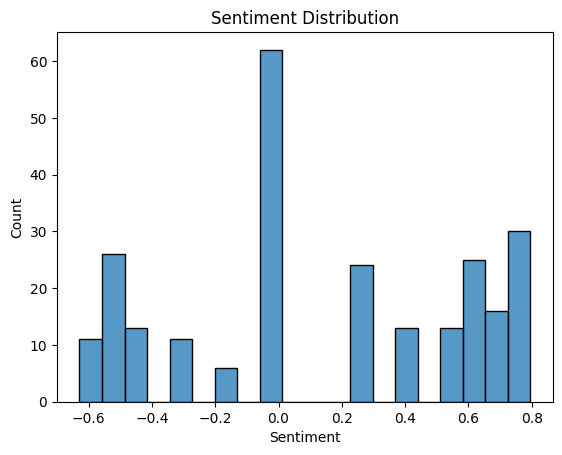

In [9]:
# Step 6: Visualization
# Sentiment distribution
sns.histplot(df['Sentiment'], bins=20)
plt.title('Sentiment Distribution')
plt.show()

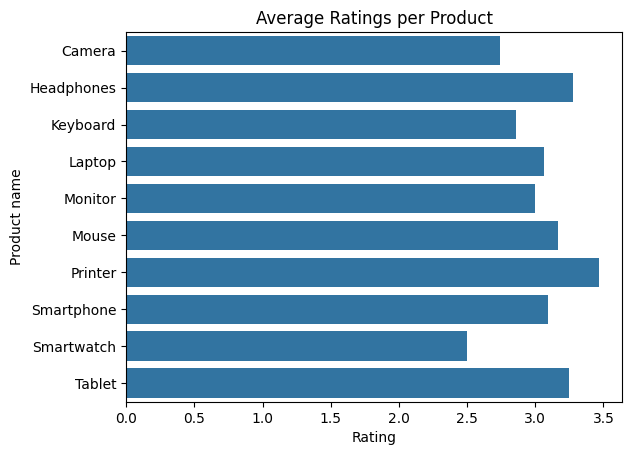

In [10]:
# Average ratings per product
avg_ratings = df.groupby('Product name')['Rating'].mean().reset_index()
sns.barplot(x='Rating', y='Product name', data=avg_ratings)
plt.title('Average Ratings per Product')
plt.show()

In [11]:
# Word clouds for positive and negative comments
positive_comments = ' '.join(df[df['Rating'] > 3]['Comment'])
negative_comments = ' '.join(df[df['Rating'] <= 3]['Comment'])

positive_wordcloud = WordCloud(stopwords=stopwords.words('english')).generate(positive_comments)
negative_wordcloud = WordCloud(stopwords=stopwords.words('english')).generate(negative_comments)

(-0.5, 399.5, 199.5, -0.5)

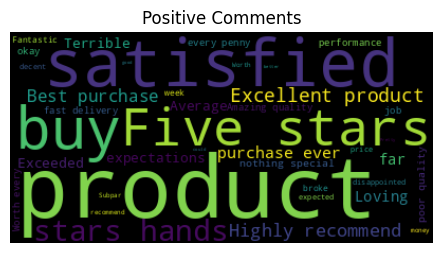

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Comments')
plt.axis('off')

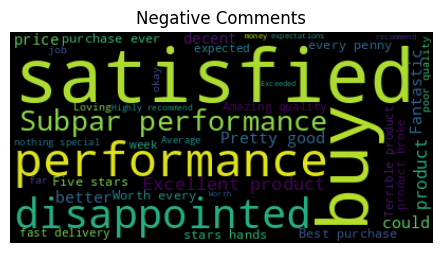

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Comments')
plt.axis('off')
plt.show()

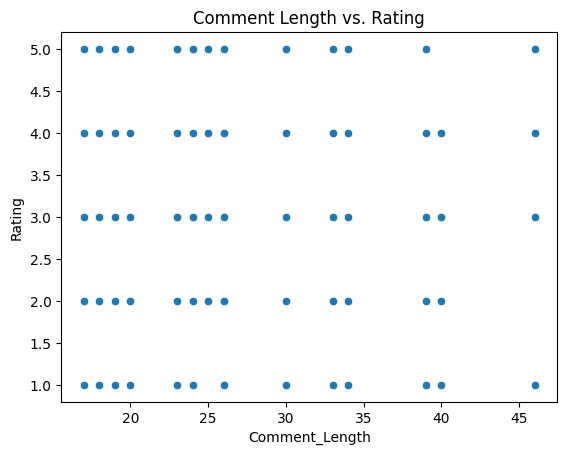

In [17]:
# Step 7: Advanced Analysis
# Correlation between comment length and rating
sns.scatterplot(x='Comment_Length', y='Rating', data=df)
plt.title('Comment Length vs. Rating')
plt.show()

In [18]:
# Step 8: Reporting
# This would typically involve saving plots and key insights into a document
# For simplicity, we'll print a few key insights here
print('Average rating per product:')
print(avg_ratings)
print('\nSentiment analysis of comments:')
print(df[['Comment', 'Sentiment']].head())

Average rating per product:
  Product name    Rating
0       Camera  2.739130
1   Headphones  3.280000
2     Keyboard  2.857143
3       Laptop  3.064516
4      Monitor  3.000000
5        Mouse  3.166667
6      Printer  3.464286
7   Smartphone  3.090909
8   Smartwatch  2.500000
9       Tablet  3.250000

Sentiment analysis of comments:
                             Comment  Sentiment
0  Average product, nothing special.    -0.3089
1         It's decent for the price.     0.0000
2           It's okay, does the job.     0.2263
3     Highly recommend this product.     0.4201
4         Fantastic, will buy again.     0.5574
